## Data Understanding

In [452]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [453]:
# Read the data set and check
bs_df = pd.read_csv('day.csv')
print('Shape:', bs_df.shape)
bs_df.head()
# 730 Rows, 16 columns/variables

Shape: (730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [454]:
# Check data type and check if any variable has null data
bs_df.info()
#No null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [455]:
# Describe the data set
bs_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### The column does not have any null values.
##### The mean and merdian are close, hence we can assume there are no outliers.

## Data Visualisation

<Figure size 1152x720 with 0 Axes>

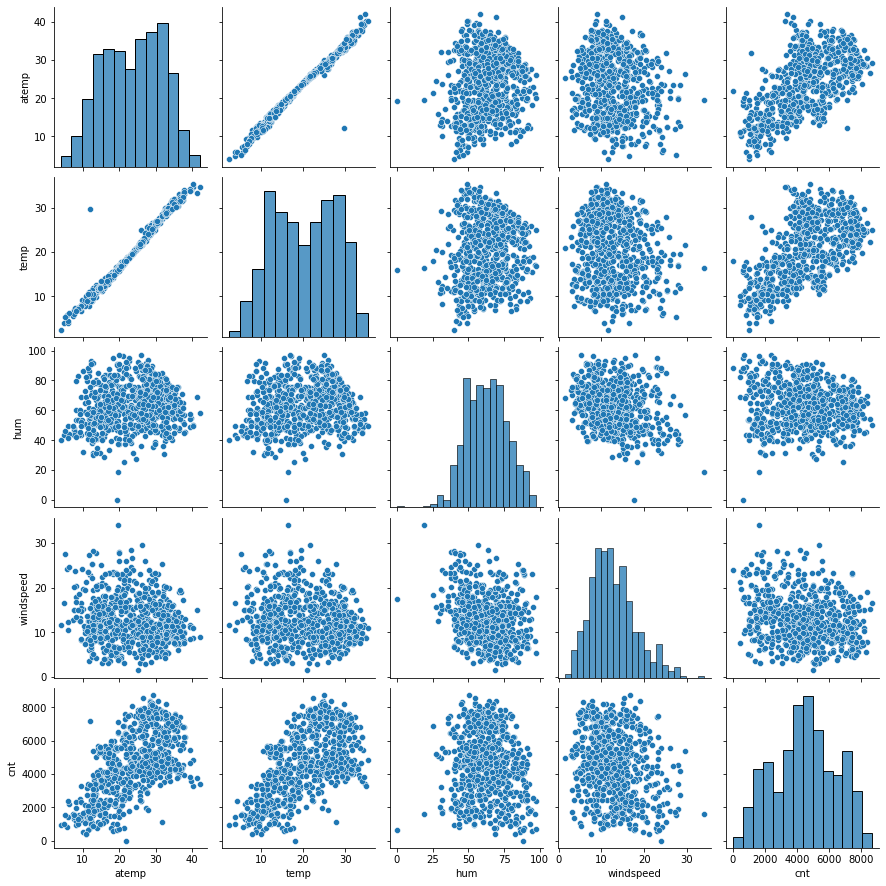

In [456]:
# Plot scatters for numeric variables
plt.figure(figsize = (16, 10))
sns.pairplot(bs_df, vars = ['atemp', 'temp', 'hum', 'windspeed', 'cnt'])
plt.show()

<Figure size 1152x720 with 0 Axes>

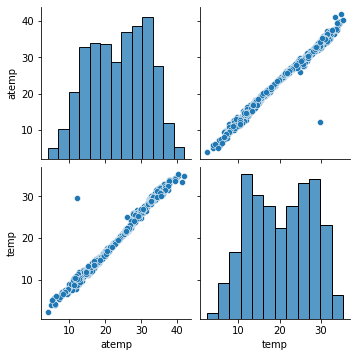

In [457]:
plt.figure(figsize = (16, 10))
sns.pairplot(bs_df, vars = ['atemp', 'temp'])
plt.show()

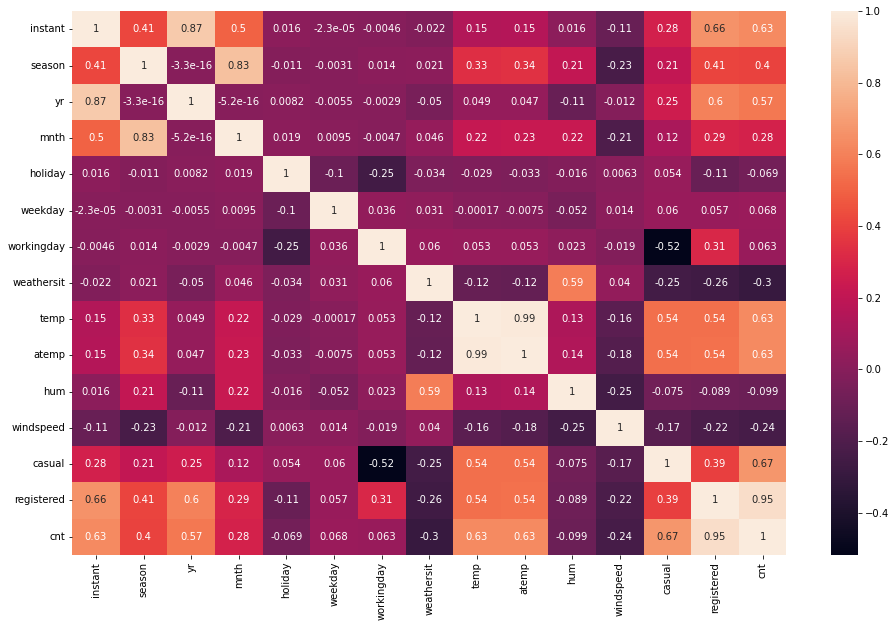

In [401]:
plt.figure(figsize = (16, 10))
sns.heatmap(bs_df.corr(), annot = True)
plt.show()

##### Temp and atemp seems to have a direct relationship from the scatter plot.
##### We can also confirm by checking their correlation(0.99) in the above heat map, hence we can drop temp variable.

In [402]:
bs_df.drop(['temp'],axis=1,inplace=True)
bs_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,82,1518,1600


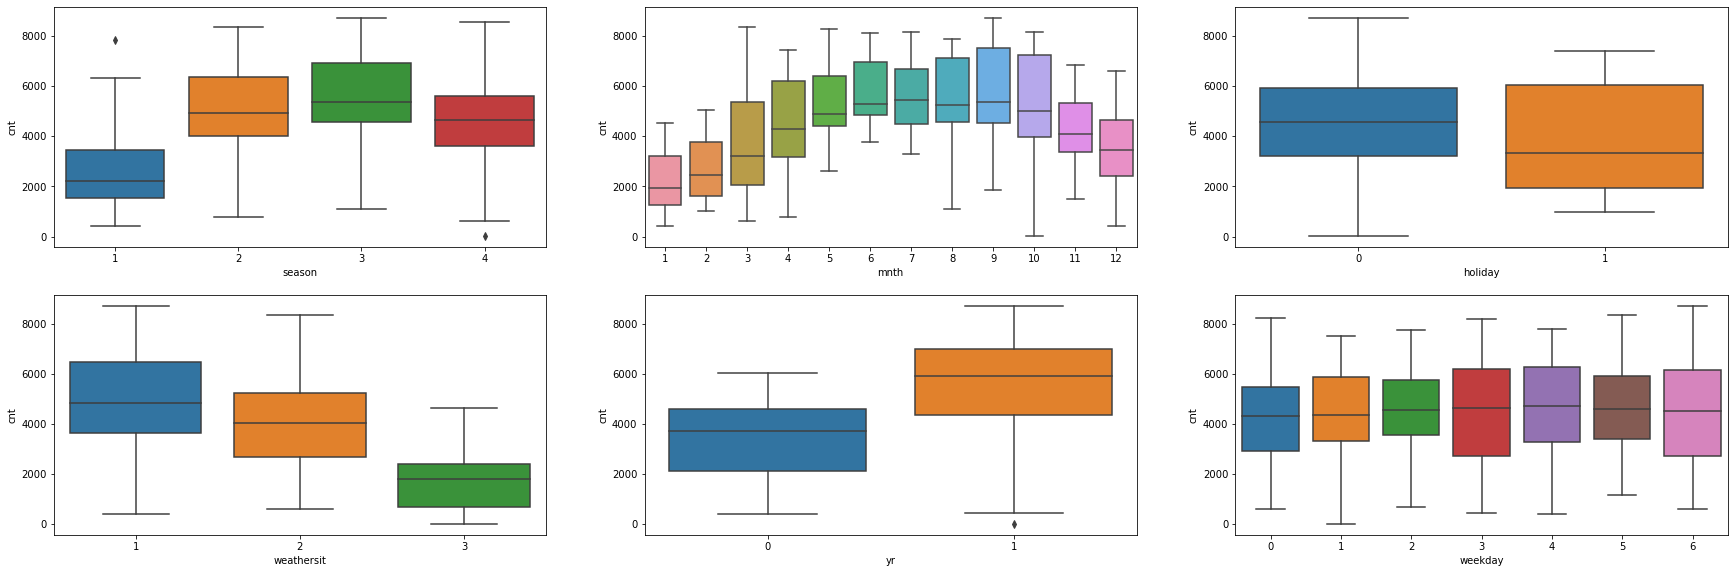

In [403]:
# Box plots for categorical variables
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bs_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bs_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bs_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bs_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs_df)
plt.show()

#### Bike rental was more in the year 2019
#### The  Fall and Summer season had more bike rentals 
#### 5th to 10th month seem to have more customers.
#### Holidays seems to have lesser rentals than the other days
#### Clear and partly cloud weather situarion attracts more customers that mist, snow and heavy rain.

## Data Preparation

In [404]:
# Drop the columns that are not so relevant
# We can remove instant(same as index), dteday(yr and mnth data are enough), 
# casual and registered( as we have the total count of both in cnt)
# bs_df.drop(['dteday', 'casual', 'registered'], axis=1, inplace=True)
bs_df.drop(['instant', 'dteday', 'casual', 'registered'],axis=1,inplace=True)


In [405]:
bs_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [406]:
# Check the catagorical variables
print(bs_df.season.unique()) # 1:spring, 2:summer, 3:fall, 4:winter
print(bs_df.yr.unique()) # 0: 2018, 1:2019 (No need to create dummy variables)
print(bs_df.mnth.unique()) # 1 to 12
print(bs_df.weekday.unique()) # days of the week
print(bs_df.weathersit.unique()) # 1: clear, 2 : mist, 3 : Light snow, 4 : Heavy Rain

[1 2 3 4]
[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[6 0 1 2 3 4 5]
[2 1 3]


In [407]:
# Converting month to categorical data
import calendar
bs_df['mnth'] = bs_df['mnth'].apply(lambda x: calendar.month_abbr[x])
print(bs_df.mnth.unique()) # 1 to 12

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


In [408]:
# Converting other variables to categorical data
bs_df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bs_df['weathersit'].replace({1: 'Clear', 2 : 'Mist', 3 : 'LightSnow', 4 : 'HeavyRain'},inplace=True)
bs_df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
print(bs_df.season.unique())
print(bs_df.weathersit.unique())
print(bs_df.weekday.unique()) # days of the week


['spring' 'summer' 'fall' 'winter']
['Mist' 'Clear' 'LightSnow']
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


In [409]:
# Create dummies for the categorical variables
dummies = bs_df[['mnth', 'season', 'weathersit', 'weekday']]
created_dummies = pd.get_dummies(dummies, drop_first = True)
bs_df=pd.concat([bs_df,created_dummies],axis=1)


In [410]:
# Drop the orginal columns of the categorical variable
bs_df.drop(['season'],axis=1,inplace=True)
bs_df.drop(['weathersit'],axis=1,inplace=True)
bs_df.drop(['weekday'],axis=1,inplace=True)
bs_df.drop(['mnth'],axis=1,inplace=True)
bs_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   atemp                 730 non-null    float64
 4   hum                   730 non-null    float64
 5   windspeed             730 non-null    float64
 6   cnt                   730 non-null    int64  
 7   mnth_Aug              730 non-null    uint8  
 8   mnth_Dec              730 non-null    uint8  
 9   mnth_Feb              730 non-null    uint8  
 10  mnth_Jan              730 non-null    uint8  
 11  mnth_Jul              730 non-null    uint8  
 12  mnth_Jun              730 non-null    uint8  
 13  mnth_Mar              730 non-null    uint8  
 14  mnth_May              730 non-null    uint8  
 15  mnth_Nov              7

In [411]:
# Split the data in to training and test data sets
np.random.seed(0)
bs_df_train, bs_df_test = train_test_split(bs_df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Feature Rescaling

In [412]:
# We are using  MinMax scaler here ranging all the values between 0 to 1
scaler=MinMaxScaler()

In [413]:
# Apply scaler to All the numeric columns, as the dummy variables are either 0 or 1
num_vars = ['cnt','hum','windspeed','atemp']
bs_df_train[num_vars] = scaler.fit_transform(bs_df_train[num_vars])
bs_df_train.describe()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_summer,season_winter,weathersit_LightSnow,weathersit_Mist,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.245098,0.24902,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.430568,0.43287,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Here we can see all the variables have data within 0 to 1

## Building a Linear Model

In [414]:
## Create X and Y data
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
Y_train = bs_df_train.pop('cnt')
X_train = bs_df_train

In [415]:
# Executing RFE(Recursive Feature Elimination )
lm = LinearRegression()
lm.fit(X_train, Y_train)
print(X_train.shape)
print(Y_train.shape)
rfe = RFE(lm)           
rfe = rfe.fit(X_train, Y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

(510, 28)
(510,)


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 11),
 ('weekday_Wednesday', False, 13)]

In [416]:
# RFE supported columns and remove the unsupported ones
rfe_col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'season_summer', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [417]:
X_train_rfe = X_train[rfe_col]
X_train_rfe.head(100)

,yr,holiday,workingday,atemp,hum,windspeed,mnth_Jul,mnth_Sep,season_spring,season_winter,weathersit_LightSnow,weathersit_Mist,weekday_Saturday,weekday_Sunday
653,1,0,1,0.501133,0.575354,0.300794,0,0,0,1,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,1,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,1,0,0,1,1,0
728,1,0,0,0.200348,0.498067,0.663106,0,0,1,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,0,1,0,0.269097,0.623443,0.570863,0,0,1,0,0,1,0,0
359,0,1,0,0.310393,0.522411,0.423857,0,0,1,0,0,0,0,0
282,0,1,0,0.608873,0.756118,0.000000,0,0,0,1,0,0,0,0
412,1,0,1,0.357771,0.653928,0.351583,0,0,1,0,0,0,0,0


In [418]:
# Using statsmodel to build the model
X_train_selected = sm.add_constant(X_train_rfe)
lm = sm.OLS(Y_train,X_train_selected).fit()

In [419]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.1
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          1.45e-188
Time:                        22:19:49   Log-Likelihood:                 507.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2449 

In [420]:
# Droping holiday considering it has the p value lot more than 0.05
X_train_selected.drop(['holiday'],axis=1,inplace=True)


In [421]:
lm = sm.OLS(Y_train,X_train_selected).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.1
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          1.45e-188
Time:                        22:19:50   Log-Likelihood:                 507.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2398      0.040      5.994      0.000       0.161       0.318
yr                       0.2317      0.008     28.400      0.000       0.216       0.248
workingday               0.0997      0.026      3.855      0.000       0.049       0.150
atemp                    0.4950      0.032     15.321      0.000       0.432       0.558
hum                     -0.1499      0.038     -3.946      0.000      -0.224      -0.075
windspeed               -0.1539      0.026     -5.986      0.000      -0.204      -0.103
mnth_Jul                -0.0733      0.017     -4.281      0.000      -0.107      -0.040
mnth_Sep                 0.0619      0.016      3.983      0.000       0.031       0.092
season_spring           -0.1130      0.015     -7.650      0.000      -0.142      -0.084
season_winter            0.0497      0.012      4.090      0.000       0.026       0.074
weathersit_LightSnow    -0.2456      0.027     -9.239      0.000      -0.298      -0.193
weathersit_Mist         -0.0595      0.011     -5.609      0.000      -0.080      -0.039
weekday_Saturday         0.1094      0.027      4.006      0.000       0.056       0.163
weekday_Sunday           0.0563      0.027      2.051      0.041       0.002       0.110
==============================================================================
Omnibus:                       61.213   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.594
Skew:                          -0.585   Prob(JB):                     2.46e-37
Kurtosis:                       5.562   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [422]:
# Calculate VIFs
vif = pd.DataFrame()
X = X_train_selected
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,99.28
2,workingday,9.07
12,weekday_Saturday,6.06
13,weekday_Sunday,5.74
3,atemp,2.92
8,season_spring,2.49
4,hum,1.90
9,season_winter,1.71
11,weathersit_Mist,1.57
6,mnth_Jul,1.29


In [423]:
# We can remove const as the VIF is too high
X_train_selected.drop(['const'],axis=1,inplace=True)

In [424]:
# Check the P value and VIF again
lm = sm.OLS(Y_train,X_train_selected).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1362.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                        0.00
Time:                        22:19:50   Log-Likelihood:                          489.86
No. Observations:                 510   AIC:                                     -953.7
Df Residuals:                     497   BIC:                                     -898.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
yr                       0.2366      0.008     28.184      0.000       0.220       0.253
workingday               0.1969      0.021      9.454      0.000       0.156       0.238
atemp                    0.5656      0.031     18.172      0.000       0.504       0.627
hum                     -0.0337      0.034     -0.998      0.319      -0.100       0.033
windspeed               -0.0903      0.024     -3.728      0.000      -0.138      -0.043
mnth_Jul                -0.0772      0.018     -4.357      0.000      -0.112      -0.042
mnth_Sep                 0.0625      0.016      3.892      0.000       0.031       0.094
season_spring           -0.0767      0.014     -5.502      0.000      -0.104      -0.049
season_winter            0.0709      0.012      5.902      0.000       0.047       0.095
weathersit_LightSnow    -0.2783      0.027    -10.340      0.000      -0.331      -0.225
weathersit_Mist         -0.0734      0.011     -6.860      0.000      -0.094      -0.052
weekday_Saturday         0.2078      0.023      9.194      0.000       0.163       0.252
weekday_Sunday           0.1512      0.023      6.515      0.000       0.106       0.197
==============================================================================
Omnibus:                       56.990   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.045
Skew:                          -0.543   Prob(JB):                     7.91e-35
Kurtosis:                       5.492   Cond. No.                         15.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [425]:
# Check the VIFs again
vif = pd.DataFrame()
X = X_train_selected
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.41
2,atemp,17.30
1,workingday,17.00
11,weekday_Saturday,4.58
4,windspeed,4.48
12,weekday_Sunday,4.47
7,season_spring,2.74
10,weathersit_Mist,2.28
0,yr,2.08
8,season_winter,2.08


In [426]:
# VIF and p-Value of hum is clearly higher than others
X_train_selected.drop(['hum'], axis=1, inplace=True)

In [427]:
# Check the P value and VIF again
lm = sm.OLS(Y_train,X_train_selected).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1476.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                        0.00
Time:                        22:19:51   Log-Likelihood:                          489.35
No. Observations:                 510   AIC:                                     -954.7
Df Residuals:                     498   BIC:                                     -903.9
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
yr                       0.2372      0.008     28.320      0.000       0.221       0.254
workingday               0.1872      0.018     10.154      0.000       0.151       0.223
atemp                    0.5490      0.026     20.890      0.000       0.497       0.601
windspeed               -0.0885      0.024     -3.662      0.000      -0.136      -0.041
mnth_Jul                -0.0746      0.018     -4.257      0.000      -0.109      -0.040
mnth_Sep                 0.0615      0.016      3.834      0.000       0.030       0.093
season_spring           -0.0815      0.013     -6.247      0.000      -0.107      -0.056
season_winter            0.0661      0.011      6.011      0.000       0.044       0.088
weathersit_LightSnow    -0.2876      0.025    -11.395      0.000      -0.337      -0.238
weathersit_Mist         -0.0793      0.009     -8.916      0.000      -0.097      -0.062
weekday_Saturday         0.1985      0.021      9.634      0.000       0.158       0.239
weekday_Sunday           0.1409      0.021      6.779      0.000       0.100       0.182
==============================================================================
Omnibus:                       58.463   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.875
Skew:                          -0.566   Prob(JB):                     8.61e-35
Kurtosis:                       5.470   Cond. No.                         12.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [428]:
# Check the VIFs again
vif = pd.DataFrame()
X = X_train_selected
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.33
2,atemp,12.33
3,windspeed,4.45
10,weekday_Saturday,3.81
11,weekday_Sunday,3.58
6,season_spring,2.40
0,yr,2.07
7,season_winter,1.74
9,weathersit_Mist,1.57
4,mnth_Jul,1.36


In [429]:
# VIF of workingday is clearly higher than others
X_train_selected.drop(['workingday'], axis=1, inplace=True)

In [430]:
# Check the P value and VIF again
lm = sm.OLS(Y_train,X_train_selected).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1329.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                        0.00
Time:                        22:19:52   Log-Likelihood:                          441.36
No. Observations:                 510   AIC:                                     -860.7
Df Residuals:                     499   BIC:                                     -814.1
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
yr                       0.2437      0.009     26.590      0.000       0.226       0.262
atemp                    0.7598      0.018     43.001      0.000       0.725       0.795
windspeed               -0.0053      0.025     -0.211      0.833      -0.054       0.044
mnth_Jul                -0.0930      0.019     -4.862      0.000      -0.131      -0.055
mnth_Sep                 0.0535      0.018      3.045      0.002       0.019       0.088
season_spring           -0.0074      0.012     -0.619      0.536      -0.031       0.016
season_winter            0.1147      0.011     10.555      0.000       0.093       0.136
weathersit_LightSnow    -0.2706      0.028     -9.789      0.000      -0.325      -0.216
weathersit_Mist         -0.0617      0.010     -6.443      0.000      -0.081      -0.043
weekday_Saturday         0.0259      0.013      2.029      0.043       0.001       0.051
weekday_Sunday          -0.0311      0.013     -2.348      0.019      -0.057      -0.005
==============================================================================
Omnibus:                       70.023   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.880
Skew:                          -0.723   Prob(JB):                     1.57e-36
Kurtosis:                       5.381   Cond. No.                         6.68
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [431]:
# Check the VIFs again
vif = pd.DataFrame()
X = X_train_selected
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.63
2,windspeed,3.94
0,yr,2.05
5,season_spring,1.65
8,weathersit_Mist,1.51
6,season_winter,1.41
3,mnth_Jul,1.35
9,weekday_Saturday,1.22
10,weekday_Sunday,1.21
4,mnth_Sep,1.19


In [432]:
# VIF was completely fine this time
# But the P value of windspeed & season_spring is clearly higher, hence dropping them
X_train_selected.drop(['windspeed', 'season_spring'], axis=1, inplace=True)
lm_fin = sm.OLS(Y_train,X_train_selected).fit()
lm_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1628.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                        0.00
Time:                        22:19:52   Log-Likelihood:                          441.00
No. Observations:                 510   AIC:                                     -864.0
Df Residuals:                     501   BIC:                                     -825.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
yr                       0.2420      0.009     27.145      0.000       0.224       0.260
atemp                    0.7576      0.015     51.605      0.000       0.729       0.786
mnth_Jul                -0.0908      0.019     -4.814      0.000      -0.128      -0.054
mnth_Sep                 0.0555      0.017      3.197      0.001       0.021       0.090
season_winter            0.1161      0.010     11.169      0.000       0.096       0.137
weathersit_LightSnow    -0.2728      0.027     -9.990      0.000      -0.326      -0.219
weathersit_Mist         -0.0634      0.009     -6.785      0.000      -0.082      -0.045
weekday_Saturday         0.0241      0.013      1.918      0.056      -0.001       0.049
weekday_Sunday          -0.0328      0.013     -2.512      0.012      -0.058      -0.007
==============================================================================
Omnibus:                       65.879   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.741
Skew:                          -0.686   Prob(JB):                     4.13e-34
Kurtosis:                       5.314   Cond. No.                         5.79
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [433]:
# Check the VIFs again
vif = pd.DataFrame()
X = X_train_selected
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,3.20
0,yr,1.95
6,weathersit_Mist,1.45
2,mnth_Jul,1.31
4,season_winter,1.30
7,weekday_Saturday,1.18
8,weekday_Sunday,1.18
3,mnth_Sep,1.17
5,weathersit_LightSnow,1.06


#### Now we can observe all the VIFs are below 5 and the P-Values are also close to 0 or < 0.05
#### This model seems to be the best fit with R2 = 0.967

## Residual Analysis

In [434]:
Y_train_pred = lm_fin.predict(X_train_selected)
Y_train_pred

653    0.737808
576    0.731821
426    0.535245
728    0.360999
482    0.499454
         ...   
526    0.756038
578    0.866563
53     0.165732
350    0.246166
79     0.265431
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

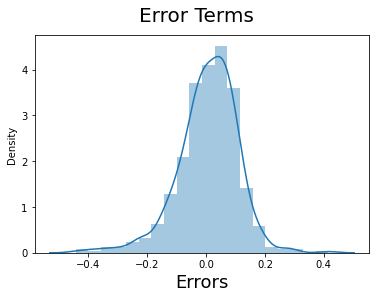

In [435]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Normally distributed

In [436]:
# Final Selected variables by the model
X_train_selected.columns

Index(['yr', 'atemp', 'mnth_Jul', 'mnth_Sep', 'season_winter',
       'weathersit_LightSnow', 'weathersit_Mist', 'weekday_Saturday',
       'weekday_Sunday'],
      dtype='object')

## Prediction on the Test data

In [437]:
# Scaling the test data
num_vars = ['cnt','hum','windspeed','atemp']

bs_df_test[num_vars] = scaler.transform(bs_df_test[num_vars])

In [438]:
#Creating test sets

y_test = bs_df_test.pop('cnt')
X_test = bs_df_test

In [439]:
# Add constant
X_test_new = sm.add_constant(X_test)

In [440]:
# predicting using values used by the final model
test_col = X_train_selected.columns
X_test_new=X_test_new[test_col[1:]]
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   atemp                 219 non-null    float64
 1   mnth_Jul              219 non-null    uint8  
 2   mnth_Sep              219 non-null    uint8  
 3   season_winter         219 non-null    uint8  
 4   weathersit_LightSnow  219 non-null    uint8  
 5   weathersit_Mist       219 non-null    uint8  
 6   weekday_Saturday      219 non-null    uint8  
 7   weekday_Sunday        219 non-null    uint8  
dtypes: float64(1), uint8(7)
memory usage: 4.9 KB


In [441]:
# Predictions using the final model
lm = sm.OLS(y_test,X_test_new).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              295.7
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                   3.62e-110
Time:                        22:20:06   Log-Likelihood:                          88.524
No. Observations:                 219   AIC:                                     -161.0
Df Residuals:                     211   BIC:                                     -133.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
atemp                    0.8926      0.030     29.637      0.000       0.833       0.952
mnth_Jul                -0.1145      0.041     -2.801      0.006      -0.195      -0.034
mnth_Sep                 0.0074      0.041      0.180      0.857      -0.074       0.088
season_winter            0.1817      0.026      6.999      0.000       0.131       0.233
weathersit_LightSnow    -0.2590      0.068     -3.793      0.000      -0.394      -0.124
weathersit_Mist         -0.0333      0.023     -1.437      0.152      -0.079       0.012
weekday_Saturday         0.0919      0.034      2.670      0.008       0.024       0.160
weekday_Sunday           0.0314      0.031      1.000      0.319      -0.031       0.093
==============================================================================
Omnibus:                        6.401   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                3.528
Skew:                          -0.045   Prob(JB):                        0.171
Kurtosis:                       2.385   Cond. No.                         4.75
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [442]:
Y_test_pred = lm.predict(X_test_new)

In [443]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, Y_test_pred)

0.026087145595499628

In [444]:
# Checking R2 score
r2_score(y_test, Y_test_pred)

0.4507484636758625

Text(0, 0.5, 'y_pred')

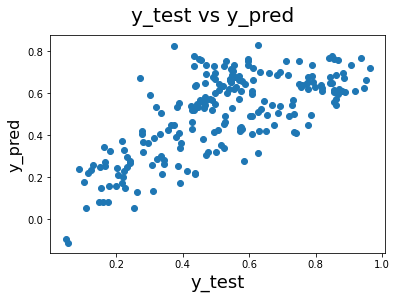

In [445]:
fig = plt.figure()
plt.scatter(y_test,Y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

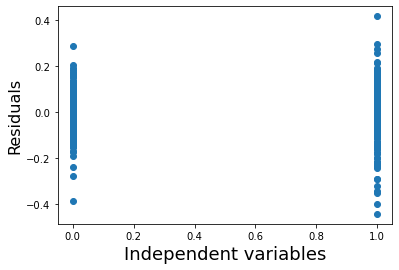

In [446]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# param = pd.DataFrame(lm.params)
# param.insert(0,'Variables',param.index)
# param.rename(columns = {0:'Coefficient value'},inplace = True)
# param['index'] = list(range(0,12))
X_t=X_train_selected.iloc[:,0].values
plt.figure()
plt.scatter(X_t,Y_train - Y_train_pred)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [447]:
X_train_selected.head()

,yr,atemp,mnth_Jul,mnth_Sep,season_winter,weathersit_LightSnow,weathersit_Mist,weekday_Saturday,weekday_Sunday
653,1,0.501133,0,0,1,0,0,0,0
576,1,0.766351,1,0,0,0,0,0,0
426,1,0.438975,0,0,0,0,1,1,0
728,1,0.200348,0,0,0,0,0,0,1
482,1,0.391735,0,0,0,0,1,1,0


In [448]:
print(lm_fin.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1628.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                        0.00
Time:                        22:21:24   Log-Likelihood:                          441.00
No. Observations:                 510   AIC:                                     -864.0
Df Residuals:                     501   BIC:                                     -825.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

#### Here is the equation of the best fitted line 

#### cnt = 0.2420 * yr + 0.7576 * atemp - 0.0908 * mnth_Jul + 0.0555 * mnth_Sep + 0.1161 * season_winter - 0.2728 * weathersit_LightSnow - 0.0634 * weathersit_Mist + 0.0241 * weekday_Saturday - 0.0328 * weekday_Sunday
##### All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.
##### Temp variable is the most significant variable.
##### Month of July and September has possibility of getting more rentals.
##### All the positive coefficients like yr, atemp, mnth_Sep, season_winter & weekday_Saturday indicate that an increase in these values will lead to an increase in the value of cnt.
